Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_excel('data.xlsx')

In [5]:
df.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [ ]:
df.info()

# Fotografía global del dataset
    Filas :3500
    Columnas:15
    Valores nulos: 0
    Tipos de variables: int64 + String
    

In [ ]:
print(type(df["Patient Sex"][0]))
print(type(df["Left-Fundus"][0]))
print(type(df["Right-Fundus"][0]))
print(type(df["Left-Diagnostic Keywords"][0]))
print(type(df["Right-Diagnostic Keywords"][0]))


Revisamos duplicados en ID

In [ ]:
df.ID.duplicated().sum()  # Verificar si hay IDs duplicados

Text(0.5, 0, 'Edad')

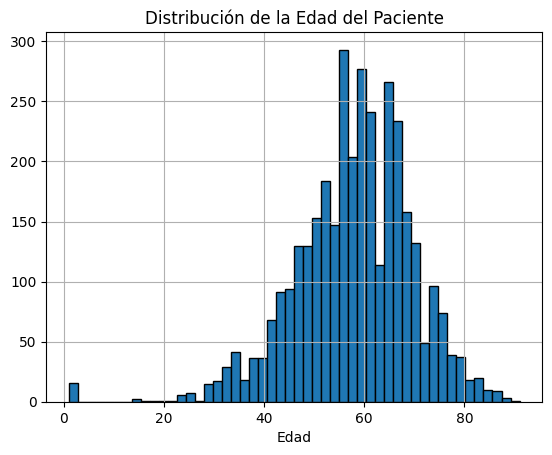

In [106]:
df["Patient Age"].hist(bins=50, edgecolor='black')
plt.title('Distribución de la Edad del Paciente')
plt.xlabel('Edad')

In [ ]:
df[df["Patient Age"] < 10]

comentar con el equipo

Patient Sex
Male      1885
Female    1615
Name: count, dtype: int64

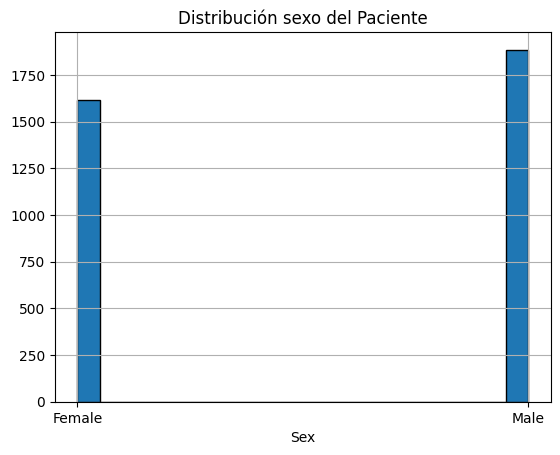

In [94]:
df["Patient Sex"].hist(bins=20, edgecolor='black')
plt.title('Distribución sexo del Paciente')
plt.xlabel('Sex')
df['Patient Sex'].value_counts()

/tmp/ipykernel_48158/3357102163.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette="Set2")


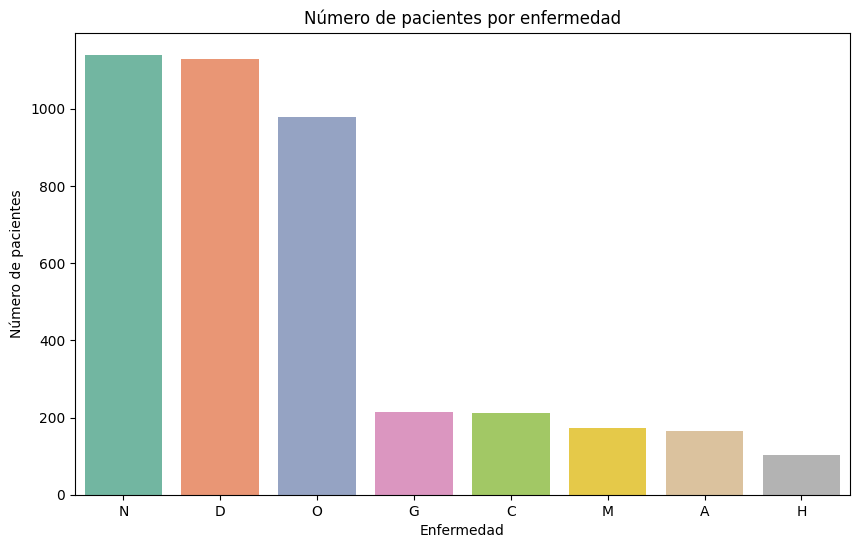

In [78]:
disease_cols = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

disease_counts = df[disease_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette="Set2")
plt.title('Número de pacientes por enfermedad')
plt.xlabel('Enfermedad')
plt.ylabel('Número de pacientes')
plt.show()

In [69]:
import pandas as pd
import re

def contar_enfermedades(df, columnas):
    """
    Devuelve (recuento_por_enfermedad, nº_total_distintas)
    """
    # Patrón que contempla:
    #   ,  -> coma ASCII
    #   ， -> coma china U+FF0C
    #   ;  -> punto y coma (opcional, por si acaso)
    separadores = r'[,\uFF0C;]\s*'

    s = (
        df[columnas]
          .stack()            # junta las columnas en un único Series
          .astype(str)        # asegura que todo es string
          .str.split(separadores, regex=True, expand=False)  # <-- AQUÍ EL CAMBIO
          .explode()          # cada elemento en su propia fila
          .str.strip()        # quita espacios al inicio/fin
          .str.lower()        # homogeneiza mayúsculas/minúsculas
    )

    s = s[s != '']            # elimina cadenas vacías
    recuento = s.value_counts()
    return recuento, recuento.size
#NUEVO
#[11:18]
cols = ["Left-Diagnostic Keywords", "Right-Diagnostic Keywords"]
conteo, total_distintas = contar_enfermedades(df, cols)

print(conteo)               # las 10 más frecuentes
print(f"\nTotal de enfermedades distintas: {total_distintas}")

normal fundus                             3100
moderate non proliferative retinopathy     997
mild nonproliferative retinopathy          552
lens dust                                  408
cataract                                   313
                                          ... 
optic discitis                               1
wedge white line change                      1
arteriosclerosis                             1
silicone oil eye                             1
no fundus image                              1
Name: count, Length: 102, dtype: int64

Total de enfermedades distintas: 102


In [74]:
df[df['Left-Diagnostic Keywords'].str.contains('no fundus image')]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
3408,4580,68,Male,4580_left.jpg,4580_right.jpg,no fundus image,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


COMENTAMOS EQUIPO

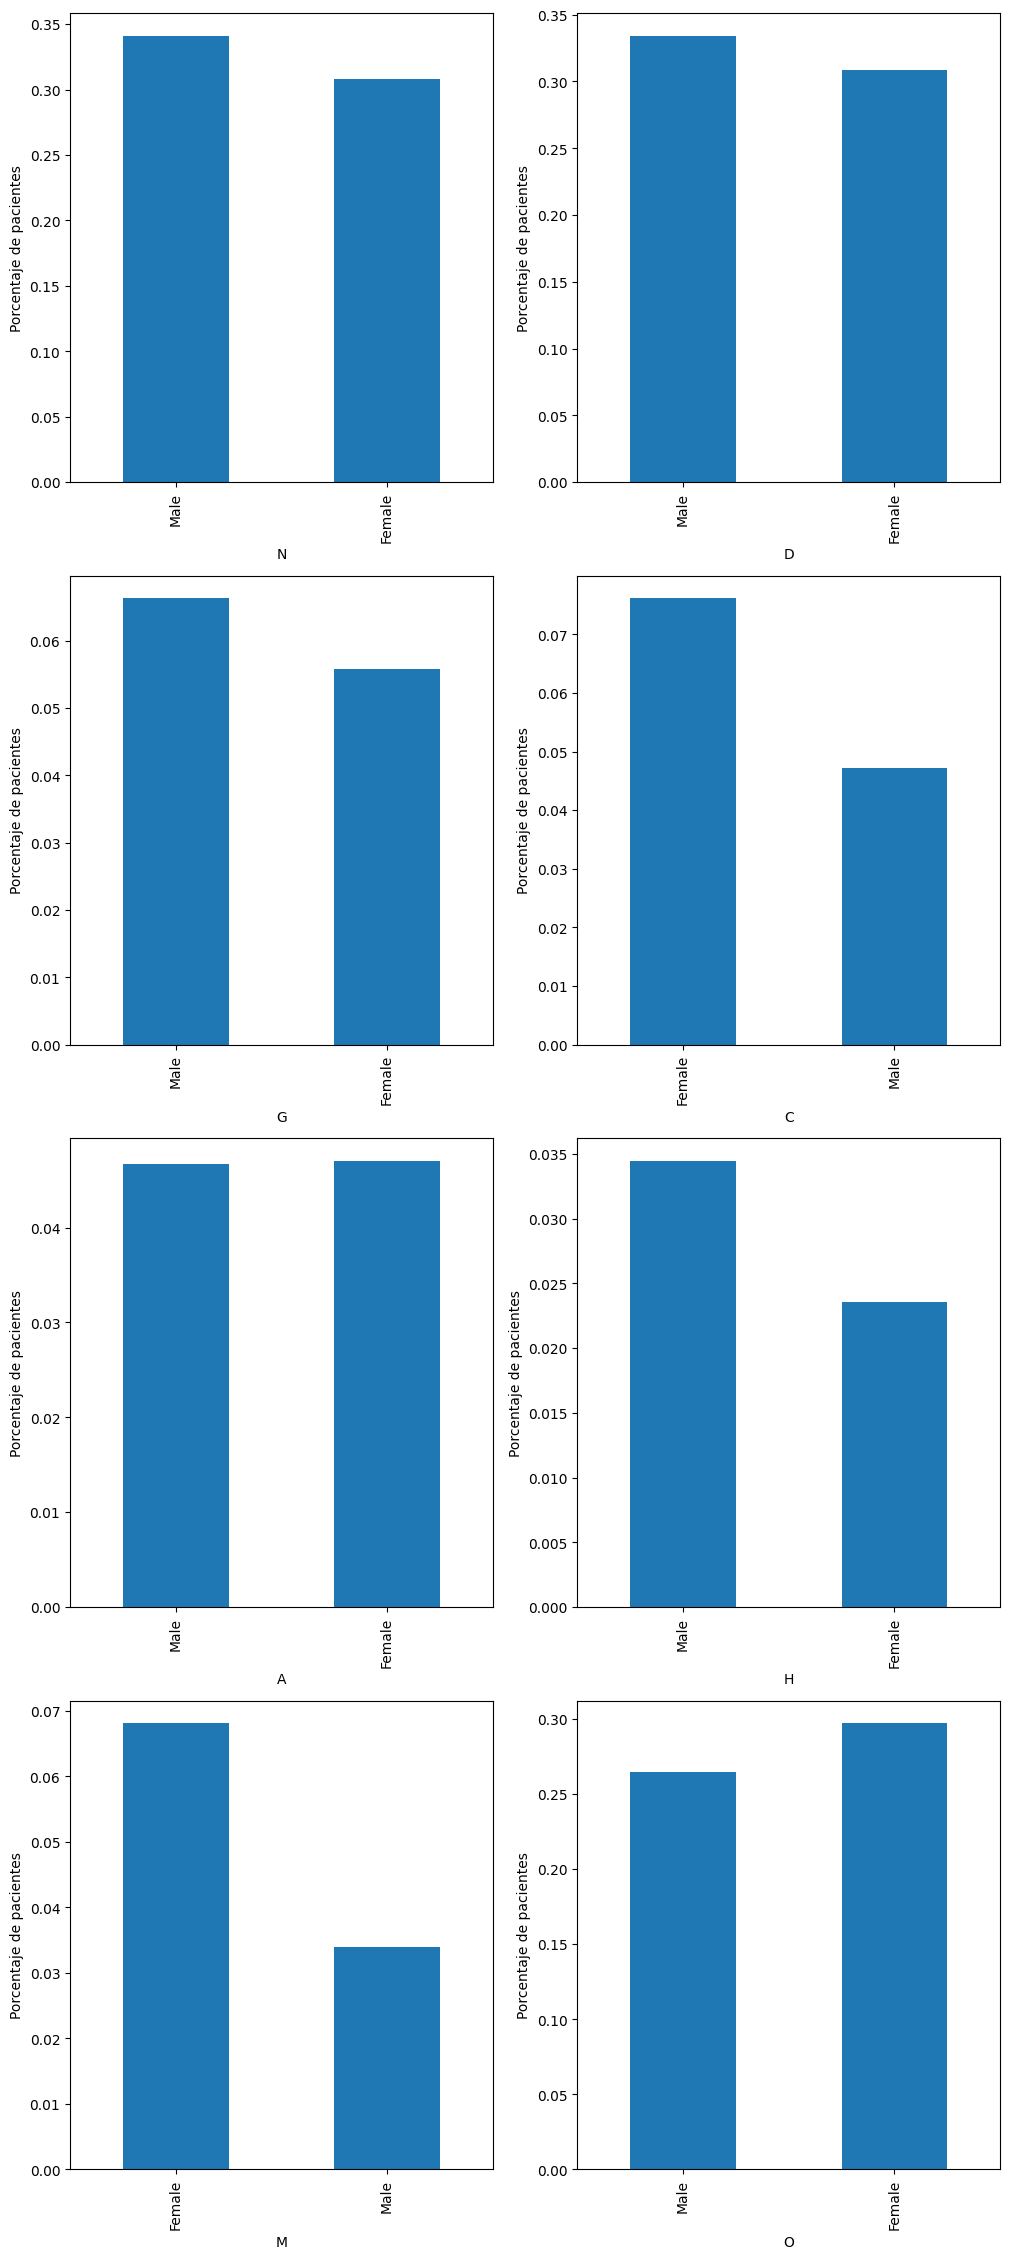

In [101]:
disease_cols = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
#print(type(df['Patient Sex'].value_counts()))
n_cols = 2
n_rows = 4
plt.figure(figsize=(6 * n_cols, 7 * n_rows))  # Dynamic figure size
for i, d in enumerate(disease_cols,start=1):
    df_sel = df[df[d] == 1]
    plt.subplot(n_rows, n_cols, i)
    counts = df_sel['Patient Sex'].value_counts()/df['Patient Sex'].value_counts()
    counts.plot.bar()
    plt.xlabel(d)
    plt.ylabel('Porcentaje de pacientes')
    
plt.show()


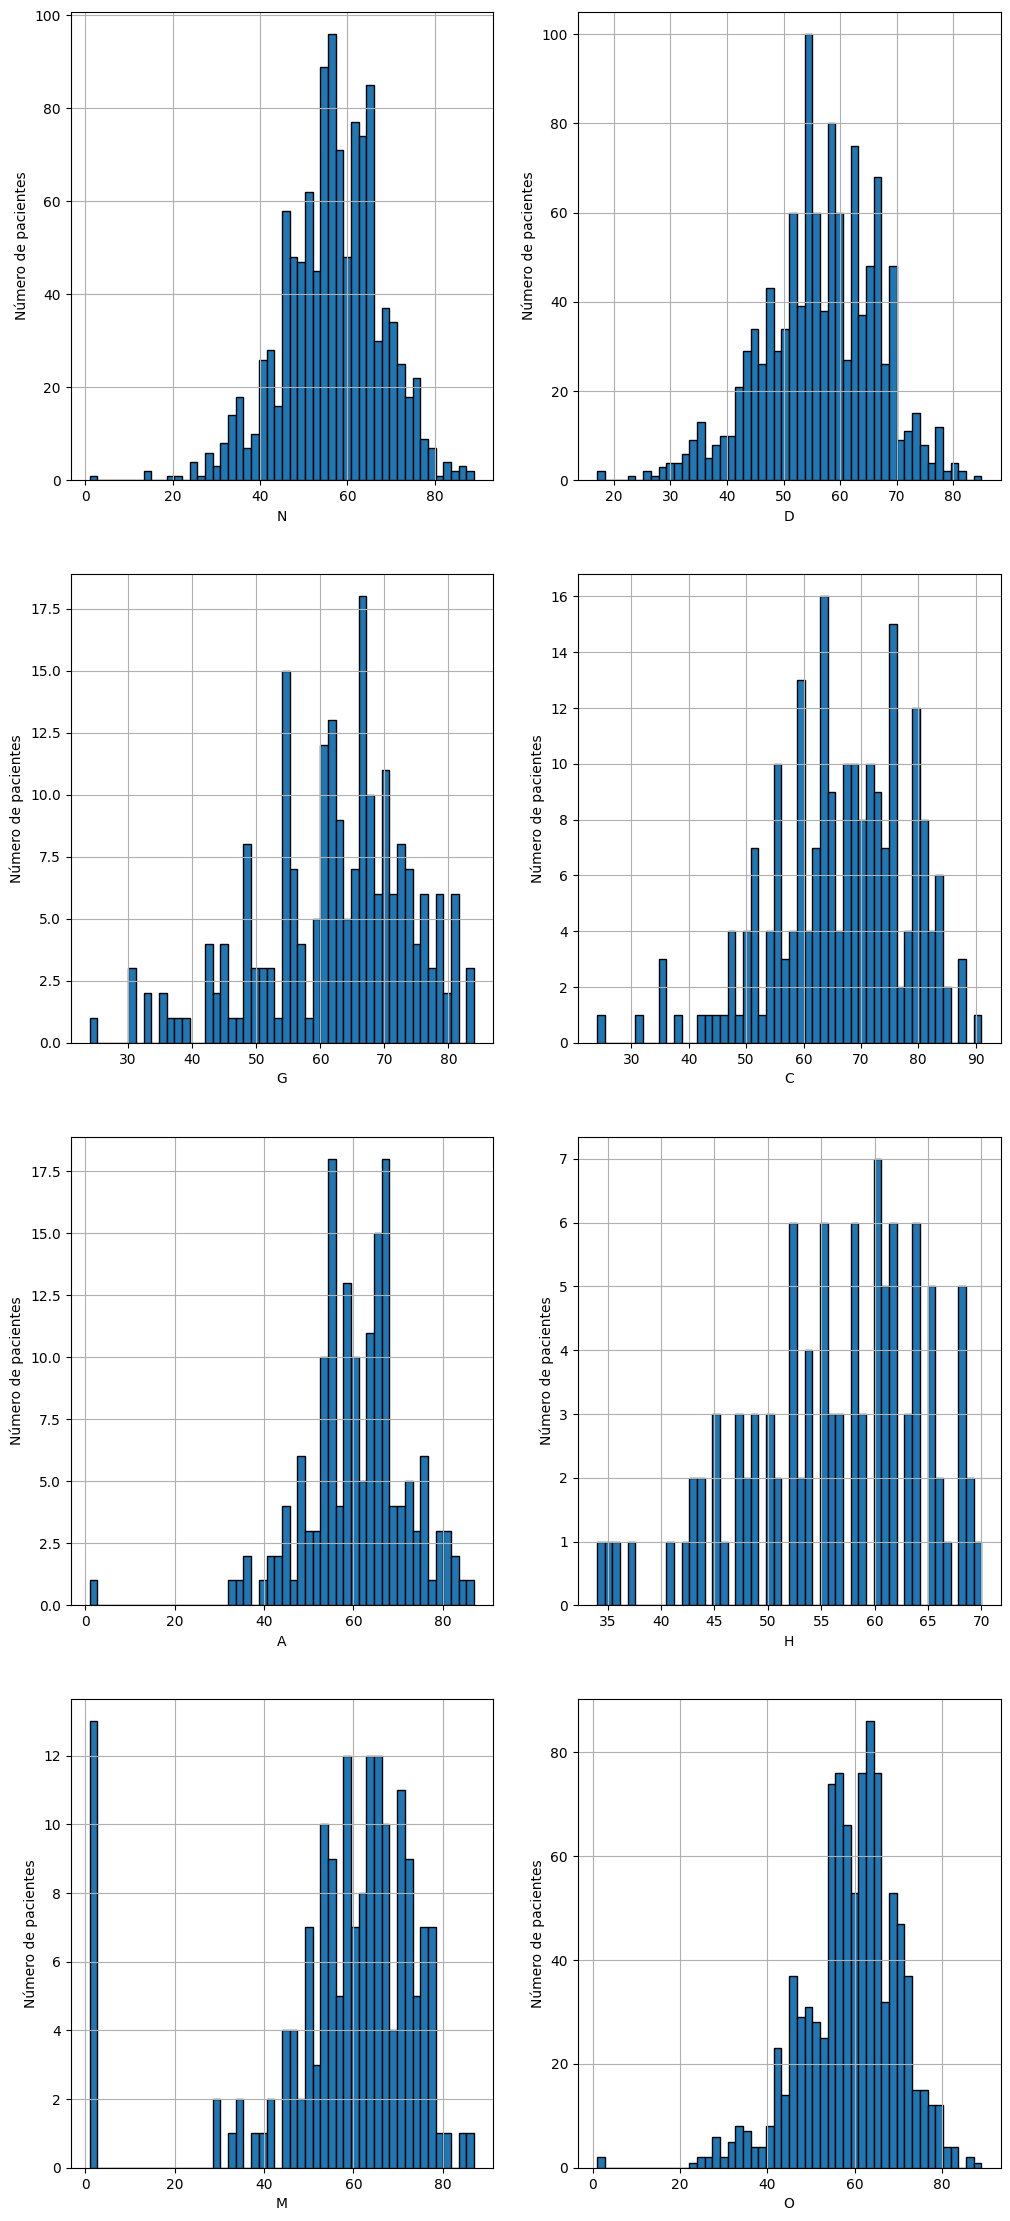

In [108]:
disease_cols = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
#print(type(df['Patient Sex'].value_counts()))
n_cols = 2
n_rows = 4
plt.figure(figsize=(6 * n_cols, 7 * n_rows))  # Dynamic figure size
for i, d in enumerate(disease_cols,start=1):
    df_sel = df[df[d] == 1]
    plt.subplot(n_rows, n_cols, i)
    #sns.kdeplot(df_sel['Patient Age'], fill=True, color='skyblue', alpha=0.5)
    df_sel["Patient Age"].hist(bins=50, edgecolor='black')
#    counts = df_sel['Patient Sex'].value_counts()/df['Patient Sex'].value_counts()
    plt.xlabel(d)
    plt.ylabel('Número de pacientes')
    
plt.show()


Tareas por hacer:
- Duplicados ID ok
-   Histogramas de age y sex ok
-  Pacientes / Enfermedades ok
-    anotaciones unicas + distribucion ok
-    Sexo / Enfermedades. ok
-    Age / Enfermedades. ok
-    Check normal en dos ojos --> N?
-    ID distribucion enfermedades
-    test estadistico de sexo / enfermedad
-    test estadistico de age / enfermedad
-    Count de enfermedades.
    
